In [10]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem import AllChem,Descriptors
import seaborn as sns
import matplotlib.pyplot as plt
from skimpy import skim
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, confusion_matrix

In [11]:
data = pd.read_csv('Data1.csv')

In [12]:
skim(data)

c:\users\03aay\appdata\local\programs\python\python38\lib\site-packages\numpy\lib\histograms.py:883: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges


╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 5632   │ │ string      │ 32    │                                                          │
│ │ Number of columns │ 48     │ │ float64     │ 14    │                                                          │
│ └───────────────────┴────────┘ │ int32       │ 2     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━┳━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━┓  │
│ ┃ column_nam ┃      ┃            ┃           ┃            ┃        ┃         ┃          ┃           ┃        ┃  │
│ ┃ e          ┃ NA   ┃ NA %       ┃ mean      ┃ sd         ┃ p0     ┃ p25     ┃ p75      ┃ p100      ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━╇━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━┩  │
│ │ Unnamed: 0 │    0 │          0 │      2800 │       1600 │      0 │    1400 │     4200 │      5600 │ ██████ │  │
│ │ activity_i │    0 │          0 │  12000000 │    7200000 │ 110000 │ 3600000 │ 18000000 │  25000000 │ ▅▁▁▃█  │  │
│ │ d          │      │            │           │            │        │         │          │           │        │  │
│ │ document_y │    0 │          0 │      2000 │        6.2 │   2000 │    2000 │     2000 │      2000 │ ▃▁▂▇█▇ │  │
│ │ ear        │      │            │           │            │        │         │          │           │        │  │
│ │ pchembl_va │ 1548 │ 27.4857954 │       6.2 │        1.5 │      3 │       5 │      7.2 │        11 │ ▁█▇▄▃  │  │
│ │ lue        │      │   54545453 │           │            │        │         │          │           │        │  │
│ │ potential_ │    0 │          0 │     0.082 │       0.27 │      0 │       0 │        0 │         1 │ █    ▁ │  │
│ │ duplicate  │      │            │           │            │        │         │          │           │        │  │
│ │ record_id  │    0 │          0 │   2000000 │    1100000 │  23000 │  980000 │  3000000 │   3900000 │ ▃▃▄▅█▁ │  │
│ │ src_id     │    0 │          0 │       8.3 │         15 │      1 │       1 │        1 │        38 │ █    ▂ │  │
│ │ standard_f │    0 │          0 │      0.98 │       0.14 │      0 │       1 │        1 │         1 │      █ │  │
│ │ lag        │      │            │           │            │        │         │          │           │        │  │
│ │ standard_t │ 5632 │        100 │       nan │        nan │    nan │     nan │      nan │       nan │        │  │
│ │ ext_value  │      │            │           │            │        │         │          │           │        │  │
│ │ standard_u │ 5632 │        100 │       nan │        nan │    nan │     nan │      nan │       nan │        │  │
│ │ pper_value │      │            │           │            │        │         │          │           │        │  │
│ │ standard_v │  119 │ 2.11292613 │ 160000000 │ 7800000000 │  1e-05 │      98 │    45000 │ 550000000 │   █    │  │
│ │ alue       │      │   63636362 │         0 │          0 │        │         │          │      0000 │        │  │
│ │ target_tax │    0 │          0 │    210000 │     170000 │    670 │    9600 │   380000 │    650000 │  █▃ █  │  │
│ │ _id        │      │            │           │        

In [13]:
data = data[['canonical_smiles', 'standard_value','target']]
data['standard_value'] = pd.to_numeric(data['standard_value'])
data = data.dropna()

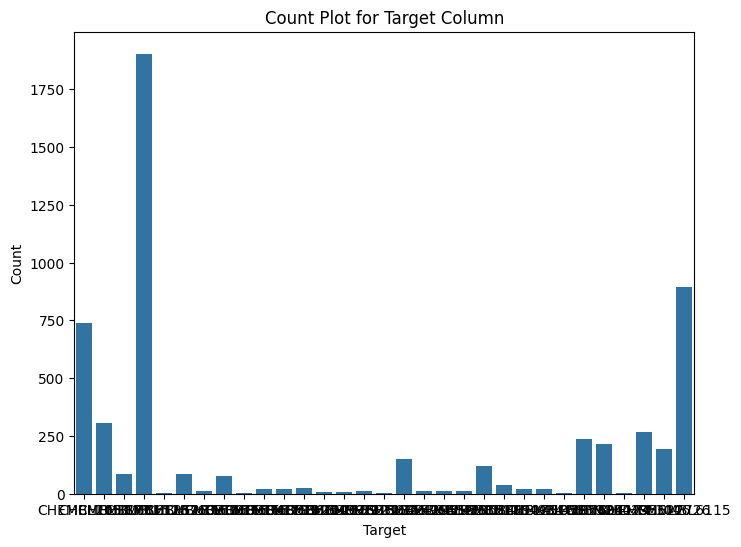

In [14]:
plt.figure(figsize=(8, 6))
sns.countplot(x='target', data=data)
plt.xlabel('Target')
plt.ylabel('Count')
plt.title('Count Plot for Target Column')
plt.show()

In [6]:
def generate_descriptors(smiles):
    mol = Chem.MolFromSmiles(smiles)
    mol = Chem.AddHs(mol)
    AllChem.Compute2DCoords(mol)
    descriptors = [Descriptors.MolWt(mol), Descriptors.MolLogP(mol), Descriptors.NumHDonors(mol), Descriptors.NumHAcceptors(mol)]
    return descriptors

In [7]:
data['descriptors'] = data['canonical_smiles'].apply(generate_descriptors)
data[['MW', 'LogP', 'NumHDonors', 'NumHAcceptors']] = pd.DataFrame(data['descriptors'].tolist(), index=data.index)

In [8]:
min_value = data['standard_value'].min()
max_value = data['standard_value'].max()

data['scaled_value'] = (data['standard_value'] - min_value) / (max_value - min_value)

In [9]:
data.head()

,canonical_smiles,standard_value,target,descriptors,MW,LogP,NumHDonors,NumHAcceptors,scaled_value
0,CC(=O)N[C@@H]([C@H](O)[C@H](O)CO)[C@H]1OC(O)(C...,40000.0,CHEMBL2051,"[309.2709999999997, -3.8717999999999964, 7, 9]",309.271,-3.87180,7,9,7.272102e-09
1,CCCCC(NC(C)=O)[C@@H]1CC(C(=O)O)C[C@H]1N=C(N)N,100.0,CHEMBL2051,"[298.3869999999995, 0.4341000000000024, 4, 4]",298.387,0.43410,4,4,1.818025e-11
2,CC(=O)N[C@H]1[C@H]([C@H](O)[C@H](O)CO)OC(C(=O)...,10000.0,CHEMBL2051,"[291.2559999999997, -3.066599999999999, 6, 8]",291.256,-3.06660,6,8,1.818026e-09
3,CCC(CC)[C@H](NC(C)=O)[C@@H]1[C@H](O)[C@@H](C(=...,1.4,CHEMBL2051,"[328.41299999999944, -0.1394299999999976, 6, 5]",328.413,-0.13943,6,5,2.545218e-13
4,CC(=O)N[C@H]1[C@H]([C@H](O)[C@H](O)CO)OC(C(=O)...,2.0,CHEMBL2051,"[332.31299999999965, -3.5758299999999963, 8, 8]",332.313,-3.57583,8,8,3.636033e-13


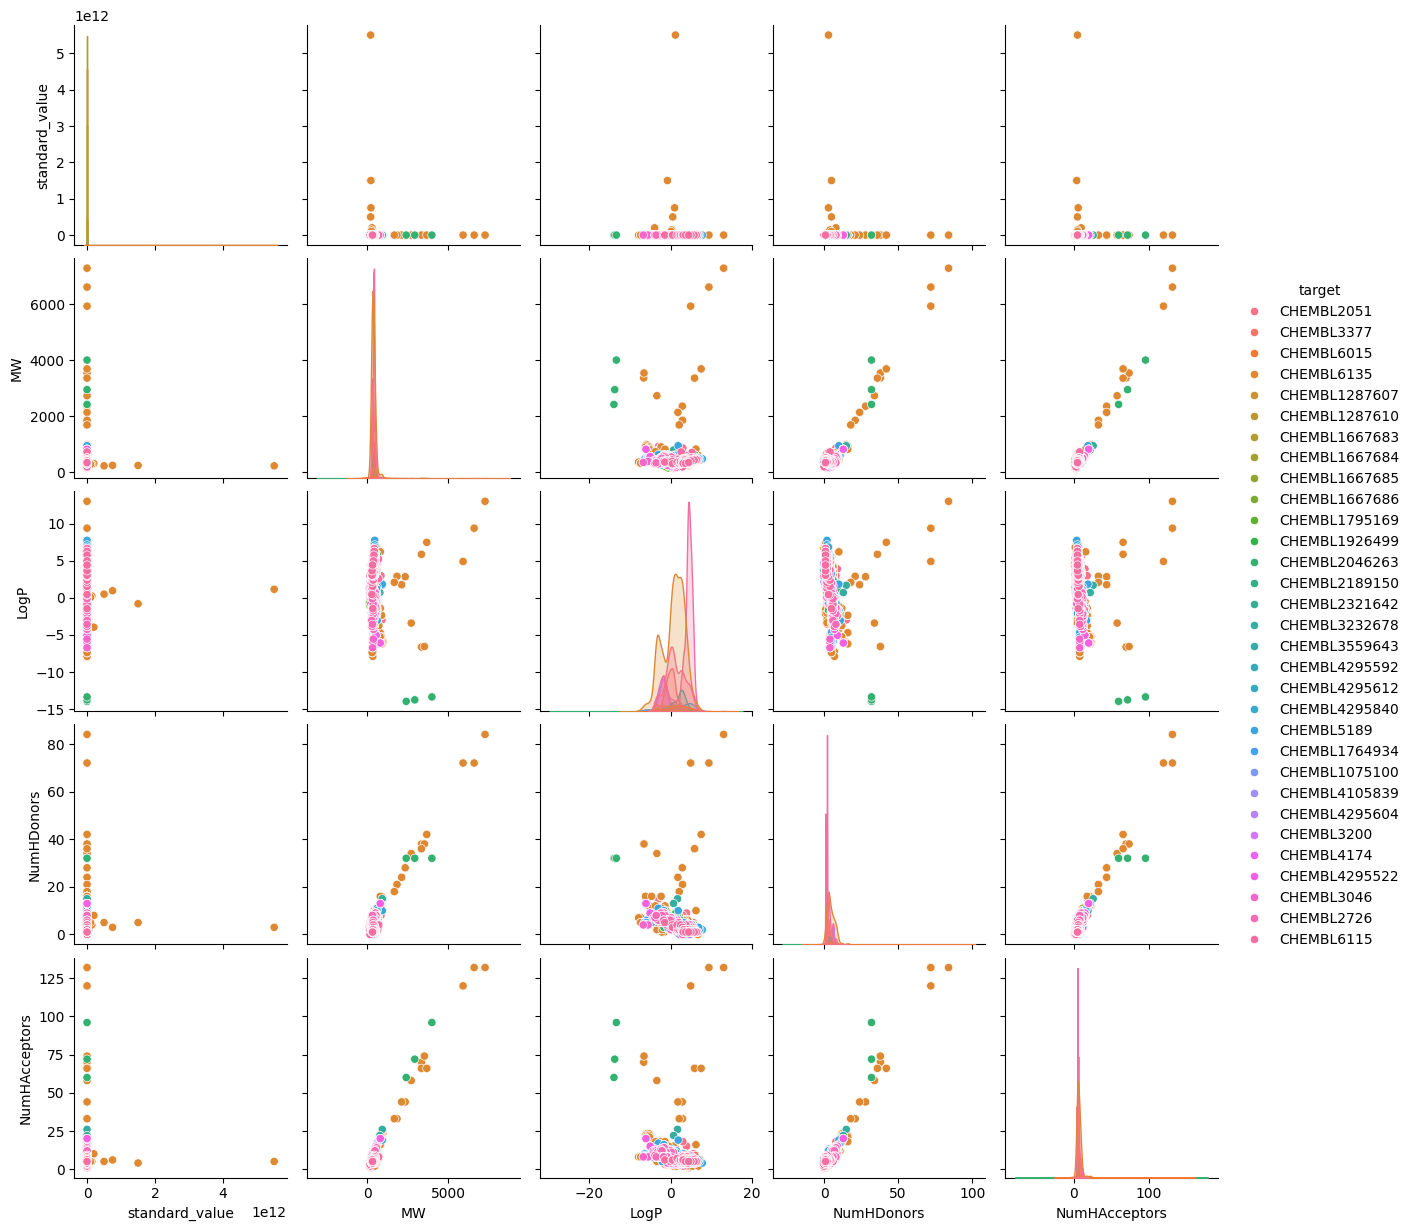

In [10]:
data = data.drop(['canonical_smiles', 'descriptors', 'scaled_value'], axis=1)
sns.pairplot(data = data,hue ='target')

In [11]:
X = data.drop('target', axis=1)
y = data['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [13]:
classifier = RandomForestClassifier(n_estimators=100,class_weight='balanced', random_state=42)

classifier.fit(X_train_scaled, y_train)

y_pred = classifier.predict(X_test_scaled)

In [14]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)

Accuracy: 0.46872166817769717
Confusion Matrix:
[[  4   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   1   0   0   0   0   1   0   0   0]
 [  0   6   0   0   1   0   0   0   1   1   0   3   0   0   0   0   0   0
    1   0   0   0   0   0   0   0   0   0   1   2]
 [  0   0   0   0   0   0   0   0   0   0   0   3   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   3   0   0   0   2   0   0   0   0   0   0   0   0   0
    6   0   0   0   2   0   1   1   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   1   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   1]
 [  0   0   0   0   0   0   8   0   0   0   0   0   0   0   1   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0]
 [  1   0   0   0   0   0   0   0   1   0   0   0   0   0   1   0   0   0
   

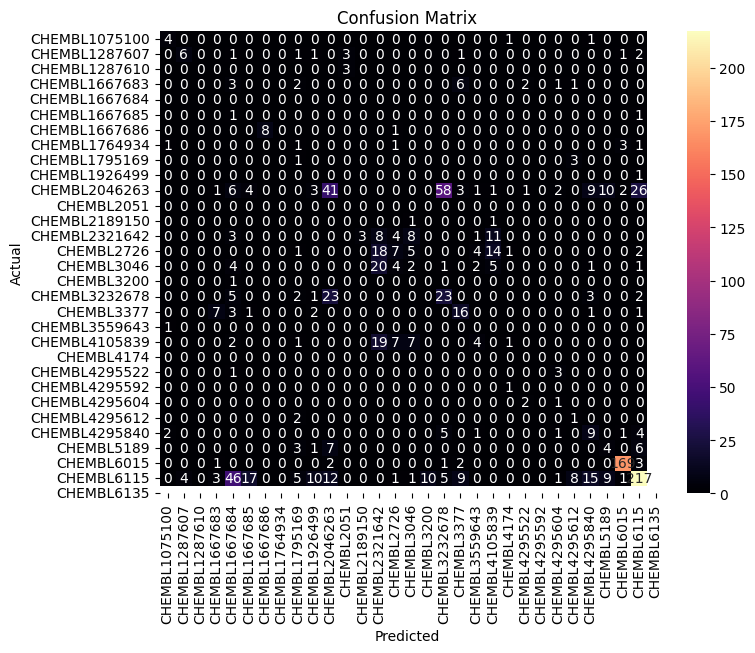

In [15]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='magma', xticklabels=classifier.classes_, yticklabels=classifier.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()